<a href="https://colab.research.google.com/github/aljebraschool/Simple_RNN/blob/main/Model_to_understand_job_descriptions_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange
import re
from bs4 import BeautifulSoup

In [ ]:
# Load the job posting dataset
indeed_job_data = pd.read_csv("/kaggle/input/indeed-job-posting-dataset/home/sdf/marketing_sample_for_trulia_com-real_estate__20190901_20191031__30k_data.csv", encoding="latin1").fillna("")

In [ ]:
indeed_job_data.head()

,Job Title,Job Description,Job Type,Categories,Location,City,State,Country,Zip Code,Address,...,Employer Phone,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",,,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,,...,,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",,,"Atlanta, GA 30342",Atlanta,GA,United States,30342,,...,,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",,,,United States,,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000
2,Senior Product Manager - Data,"<div id=""jobDescriptionText"" class=""jobsearch-...",,,"Chicago, IL",Chicago,IL,United States,,,...,,,Vibes Corp. reputation was built and establish...,,,,United States,,a0e0d12df1571962b785f17f43ceae12,2019-09-18 02:13:10 +0000
3,Part-Time Office Concierge,"<div id=""jobDescriptionText"" class=""jobsearch-...",,,"Festus, MO",Festus,MO,United States,,,...,,,,,,,United States,,56e411fd731f76ac916bf4fb169250e9,2019-10-24 16:39:13 +0000
4,Print & Marketing Associate,"<div id=""jobDescriptionText"" class=""jobsearch-...",,,"Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,,...,,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Staples is The Worklife Fulfillment Company, h...","Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,3fff5c0ad6981bf4bff6260bd5feab63,2019-08-24 22:29:10 +0000


In [ ]:
# Subsample the dataset (10%)
indeed_job_data = indeed_job_data.sample(frac=0.1, random_state=42)

In [ ]:
# Define a function to clean HTML content, if job descriptions contain HTML
def clean_html(raw_html):
    # Check if it's really HTML content
    if isinstance(raw_html, str):
        soup = BeautifulSoup(raw_html, "html.parser")
        return ' '.join(soup.stripped_strings)  # Remove all HTML tags and join text
    return raw_html

In [ ]:
# Apply the clean_html function to the column containing job descriptions
indeed_job_data['Job Description'] = indeed_job_data['Job Description'].apply(clean_html)

In [ ]:
indeed_job_data.head()

,Job Title,Job Description,Job Type,Categories,Location,City,State,Country,Zip Code,Address,...,Employer Phone,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp
2308,SHIFT MANAGER,First-Line Supervisors of Food Preparation and...,,,"Baton Rouge, LA 70815",Baton Rouge,LA,United States,70815,,...,,,,,,,United States,,76e1610d1466d99b81690f9e4e092943,2019-09-20 13:00:34 +0000
22405,Digital Marketing Coordinator,PHALEN LEADERSHIP ACADEMIES DIGITAL MARKETING ...,,,"Beaumont, TX",Beaumont,TX,United States,,,...,,,,,,,United States,,d31f52dde60c1f4ea4260e90244a8de1,2019-10-14 03:46:19 +0000
28461,EDM Applications Engineer,Makino is a world leader in metal-cutting and ...,,,"Newark, NJ",Newark,NJ,United States,,,...,,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Makino, a global leader in high-performance CN...",,,,United States,,07c58cf8f6cd8d37ab8b6313d7a50e71,2019-09-18 13:26:35 +0000
25059,Power & Drives Systems Field Service Engineer,Role Summary: The Power & Drives Systems Field...,,,"Cranberry Township, PA 16066",Cranberry Township,PA,United States,16066,,...,,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,GE Power is a world energy leader providing eq...,,,,United States,,d9284f430768a3fd166bf974a6dd8d32,2019-10-23 01:38:28 +0000
2664,"Coordinator, Order Management",Overview of Job Function: Under general direct...,,,"Denver, CO 80234",Denver,CO,United States,80234,,...,,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Verint (Nasdaq: VRNT) is a global leader in Ac...,"Denver, CO 80234",Denver,CO,United States,80234,5f70f0fcffef8158102c4dfa7fb85035,2019-08-23 19:37:05 +0000


In [ ]:
# def clean_html(raw_html):
#     soup = BeautifulSoup(raw_html, "html.parser")
#     return ' '.join(soup.stripped_strings)

In [ ]:
def preprocess_job_posting_data(job_data):
    processed_data = []

    # Define regex patterns for skills, qualifications, and experience
    skill_pattern = r'\b(?:skills?|proficiency|expertise|proficient|experience\s+(?:with|in)|knowledge\s+of)\b'
    qualification_pattern = r'\b(?:qualifications?|degree|education|certification|diploma|bachelor|master)\b'
    experience_pattern = r'\b(?:experience|years\s+of|work\s+history)\b'

    for _, job in tqdm(job_data.iterrows(), desc="Processing job postings", total=len(job_data)):
        job_id = job['Uniq Id']
        title = clean_html(str(job['Job Title']))
        description = clean_html(str(job['Job Description']))
        job_type = str(job['Job Type'])

        # Process job title
        title_words = title.split()
        for i, word in enumerate(title_words):
            processed_data.append([f"{job_id}_title", word, 'B-TITLE' if i == 0 else 'I-TITLE'])

        # Process job type
        if job_type and job_type.lower() != 'nan':
            job_type_words = job_type.split()
            for i, word in enumerate(job_type_words):
                processed_data.append([f"{job_id}_type", word, 'B-JOBTYPE' if i == 0 else 'I-JOBTYPE'])

        # Process job description
        desc_words = description.split()
        current_tag = 'O'
        for i, word in enumerate(desc_words):
            if re.search(skill_pattern, ' '.join(desc_words[max(0, i-2):i+3]), re.IGNORECASE):
                current_tag = 'SKILL'
            elif re.search(qualification_pattern, ' '.join(desc_words[max(0, i-2):i+3]), re.IGNORECASE):
                current_tag = 'QUALIFICATION'
            elif re.search(experience_pattern, ' '.join(desc_words[max(0, i-2):i+3]), re.IGNORECASE):
                current_tag = 'EXPERIENCE'

            if current_tag != 'O':
                tag = f'B-{current_tag}' if i == 0 or desc_words[i-1].endswith('.') else f'I-{current_tag}'
            else:
                tag = 'O'

            processed_data.append([f"{job_id}_desc_{i//50}", word, tag])

            if word.endswith('.'):
                current_tag = 'O'

    return pd.DataFrame(processed_data, columns=['Sentence #', 'Word', 'Tag'])

In [ ]:
# Preprocess the data
data = preprocess_job_posting_data(indeed_job_data)

Processing job postings:   0%|          | 0/3000 [00:00<?, ?it/s]/tmp/ipykernel_204/2154294003.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(raw_html, "html.parser")
Processing job postings: 100%|██████████| 3000/3000 [00:26<00:00, 113.11it/s]


In [ ]:
data.head(10)

,Sentence #,Word,Tag
0,76e1610d1466d99b81690f9e4e092943_title,SHIFT,B-TITLE
1,76e1610d1466d99b81690f9e4e092943_title,MANAGER,I-TITLE
2,76e1610d1466d99b81690f9e4e092943_desc_0,First-Line,O
3,76e1610d1466d99b81690f9e4e092943_desc_0,Supervisors,O
4,76e1610d1466d99b81690f9e4e092943_desc_0,of,O
5,76e1610d1466d99b81690f9e4e092943_desc_0,Food,O
6,76e1610d1466d99b81690f9e4e092943_desc_0,Preparation,O
7,76e1610d1466d99b81690f9e4e092943_desc_0,and,O
8,76e1610d1466d99b81690f9e4e092943_desc_0,Serving,O
9,76e1610d1466d99b81690f9e4e092943_desc_0,Workers.,O


In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                     s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
# Create SentenceGetter object
getter = SentenceGetter(data)

/tmp/ipykernel_204/20316478.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence #").apply(agg_func)


In [ ]:
sentences = [[word[0] for word in sentence] for sentence in getter.sentences]
labels = [[s[1] for s in sentence] for sentence in getter.sentences]

# Print an example to verify the preprocessing
print("Example sentence:", sentences[1])
print("Example labels:", labels[1])


Example sentence: ['Within', 'their', 'designated', 'enterprise', 'product', 'line,', 'Sr.', 'Product', 'Managers', 'work', 'closely', 'with', 'teams', 'of', 'developers,', 'designers,', 'and', 'business', 'partners.', 'They', 'support', 'in-depth', 'business', 'reviews,', 'communicate', 'and', 'present', 'across', 'all', 'levels', 'of', 'the', 'organization', 'and', 'support', 'cross-functional', 'product', 'teams.', 'Importantly,', 'the', 'Sr.', 'Product', 'Manager,', 'must', 'be', 'able', 'to', 'work', 'at', 'the']
Example labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
# Define tag values
tag_values = list(set(data['Tag'].values))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}

print("Unique tags:", tag_values)

Unique tags: ['O', 'B-SKILL', 'B-EXPERIENCE', 'I-QUALIFICATION', 'B-QUALIFICATION', 'I-TITLE', 'I-EXPERIENCE', 'I-SKILL', 'B-TITLE', 'PAD']


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__


'2.4.0'

In [ ]:
MAX_LEN = 75
bs = 32

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
print(n_gpu)

2


In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels


In [ ]:
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(sentences, labels)
]


In [ ]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]


In [ ]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")


In [ ]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")


In [ ]:
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]


In [ ]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)


In [ ]:
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)


In [ ]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)


In [ ]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__


'4.44.0'

In [ ]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [ ]:
model.cuda()

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 5
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)


In [ ]:
!pip install seqeval

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
from seqeval.metrics import f1_score, accuracy_score

In [ ]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []

for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.
    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)


    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

    eval_loss = eval_loss / len(valid_dataloader)
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))

    # Modify the F1-score calculation by ignoring 'PAD' tokens
    pred_tags = [
        [tag_values[p_i] for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
        for p, l in zip(predictions, true_labels)
    ]
    valid_tags = [
        [tag_values[l_i] for l_i in l if tag_values[l_i] != "PAD"]
        for l in true_labels
    ]

    # Now calculate the validation metrics
    print("Validation Accuracy: {}".format(accuracy_score(pred_tags, valid_tags)))
    print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Average train loss: 0.28086655607407834
Validation loss: 0.1892485630194672
Validation Accuracy: 0.927759157289921


/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PAD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
Epoch:  20%|██        | 1/5 [07:59<31:56, 479.01s/it]

Validation F1-Score: 0.5800775112600818

Average train loss: 0.16353814853636475
Validation loss: 0.17042217745644148
Validation Accuracy: 0.934753240534902


Epoch:  40%|████      | 2/5 [16:01<24:04, 481.35s/it]

Validation F1-Score: 0.7270013857797677

Average train loss: 0.11446156758177695
Validation loss: 0.2039152071582245
Validation Accuracy: 0.9350909743835288


Epoch:  60%|██████    | 3/5 [24:05<16:04, 482.13s/it]

Validation F1-Score: 0.7412248339833457

Average train loss: 0.07533792868062295
Validation loss: 0.2470108507292681
Validation Accuracy: 0.9366043640343377


Epoch:  80%|████████  | 4/5 [32:08<08:02, 482.47s/it]

Validation F1-Score: 0.7619441571871769

Average train loss: 0.05026499704480825
Validation loss: 0.2802587204200567
Validation Accuracy: 0.9345993365026164


Epoch: 100%|██████████| 5/5 [40:11<00:00, 482.21s/it]

Validation F1-Score: 0.7588241277591292



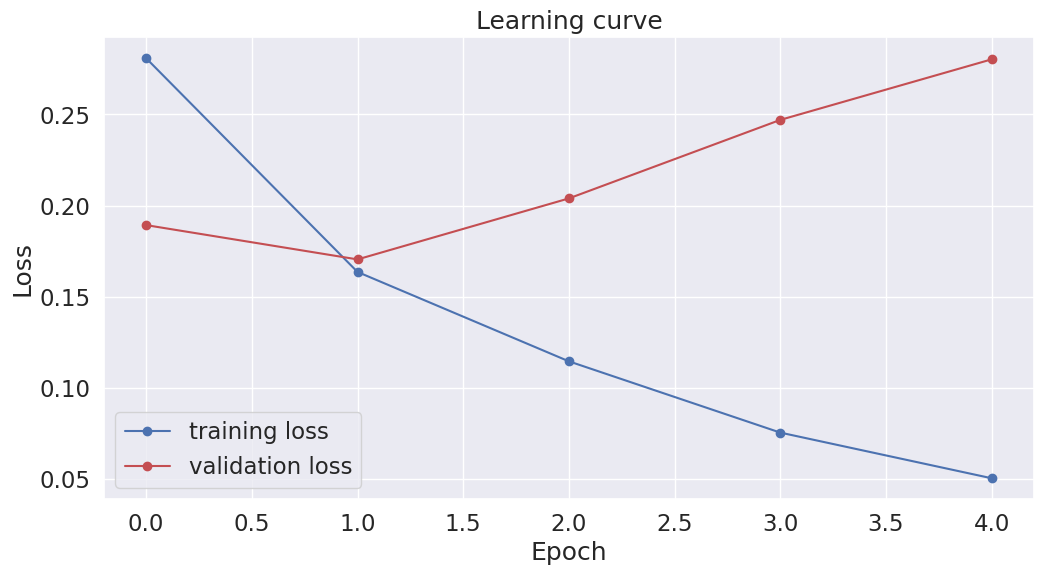

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [ ]:
import os

# Define the path for the new folder
new_folder_path = '/kaggle/working/model_output'

# Create the new folder
os.makedirs(new_folder_path, exist_ok=True)

print(f"Folder created at: {new_folder_path}")


Folder created at: /kaggle/working/model_output


In [ ]:
import torch

# Quantize the model
quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# Save the quantized model with PyTorch's torch.save
torch.save(quantized_model.state_dict(), new_folder_path + "/quantized_model.pth")

# Save the tokenizer as usual with Hugging Face's save_pretrained
tokenizer.save_pretrained(new_folder_path)

print("Quantized model and tokenizer saved!")


Quantized model and tokenizer saved!


In [ ]:
test_sentence = """
  ANUVA GOYAL D.O.B.: 1st October 2000 Gender: Female OBJECTIVE Energetic,
   innovative engineering undergraduate, passionate about Machine Learning,
   NLP and Deep Learning for solving real-world problems, aiming to work in an organization providing great learning experience and growth opportunities
   for mutual benefit. EDUCATION Qualification Institute CGPA Year of Completion B.Tech. Dayalbagh Educational Institute,
   CGPA 9.35 2023 (Electrical Engineering (Till 4 Dayalbagh, Agra Pursuing Specialization in Computer Science) semesters)

"""

In [ ]:
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()


In [ ]:
with torch.no_grad():
    output = model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)


In [ ]:
# join bpe split tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []
for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(tag_values[label_idx])
        new_tokens.append(token)


In [ ]:
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(label, token))


O	[CLS]
O	ANUVA
O	GOYAL
O	D
O	.
O	O
O	.
O	B
O	.
O	:
O	1st
O	October
O	2000
O	Gender
O	:
O	Female
O	OBJECTIVE
O	Energetic
O	,
O	innovative
O	engineering
O	undergraduate
O	,
O	passionate
O	about
O	Machine
O	Learning
O	,
O	NLP
O	and
O	Deep
O	Learning
O	for
O	solving
I-EXPERIENCE	real
O	-
O	world
O	problems
O	,
O	aiming
O	to
O	work
O	in
O	an
O	organization
O	providing
I-EXPERIENCE	great
I-EXPERIENCE	learning
I-EXPERIENCE	experience
I-EXPERIENCE	and
I-EXPERIENCE	growth
I-EXPERIENCE	opportunities
I-EXPERIENCE	for
I-EXPERIENCE	mutual
I-QUALIFICATION	benefit
I-QUALIFICATION	.
B-QUALIFICATION	EDUCATION
I-QUALIFICATION	Qualification
I-QUALIFICATION	Institute
I-QUALIFICATION	CGPA
I-QUALIFICATION	Year
I-QUALIFICATION	of
I-QUALIFICATION	Completion
I-QUALIFICATION	B
I-QUALIFICATION	.
I-QUALIFICATION	Tech
I-QUALIFICATION	.
B-QUALIFICATION	Dayalbagh
I-QUALIFICATION	Educational
I-QUALIFICATION	Institute
I-QUALIFICATION	,
I-QUALIFICATION	CGPA
I-QUALIFICATION	9
I-QUALIFICATION	.
I-QUALIFICATION	35
I-QUAL